<a href="https://colab.research.google.com/github/DSamodra/playGround/blob/master/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas DTI Multiple Regression**
Dimas Samodra / DS0107 

**Studi kasus**

masalah yang diangkat yaitu perhitungan multiple linear regression dari suatu distribusi makanan frozen pie untuk mengevaluasi faktor yang mempengaruhi permintaan. kita bisa bagi menjadi dua variable yaitu :

*   Dependent Variable : Pie Sales
*   Independent Variable : Price, Advertising

Asumsi yang didapatkan :

*   penjualan pie dengan harga mempunyai hubungan korelasi positif atau negatif
*   penjualan pie dengan iklan mempunyai hubungan korelasi positif atau negatif



## **Import library for data wragling and counting**

using pandas, statsmodels, seaborn, matplotlib, sklearn

In [1]:
#import panda and another tools
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Load the data set**

kita menggunakan data set yang diberikan yaitu penjualan sales selama 15 minggu

In [2]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


# **Show plot with sklearn**

Menampilkan plot agar dapat melihat hubungan dependent variable berhubungan dengan independent variable lainnya.

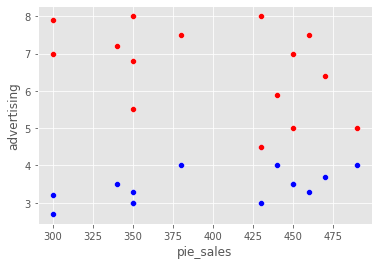

In [49]:
#plot for pie sales and price

sns.scatterplot(x="pie_sales", y="advertising", color='blue', data= df)
sns.scatterplot(x="pie_sales", y="price", color='red', data= df)

# **Show plot regresion with Seaborn**
Pada sklearn kita bisa lihat titik titik dimana independent variable dan hubungan variable antara pie sales dengan advertising dan price. kemudian pada Seaborn dibuat garis yang menunjukkan regeresi linear dari variable yang disebutkan diatas

Dari gambar grafik yang dihasilkan bisa diasumsikan bahwa :

penjualan pie dipengaruhi dengan harga, semakin rendah harganya maka akan semakin tinggi penjualannya dan faktor lain yaitu iklan semakin tinggi maka penjualan semakin meningkat.

kesimpulan:
1.   pie_sales : price = hubungan korelasi negatif
2.   pie_sale : advertising = hubungan korelasi positif



Text(0, 0.5, 'value')

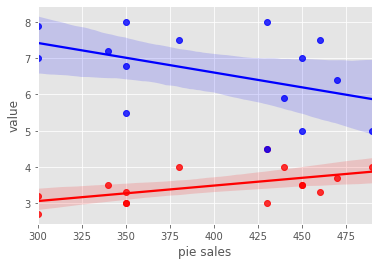

In [48]:
#show plot with seaborn
sns.regplot(x=df.pie_sales, y=df.advertising, color='red')
sns.regplot(x=df.pie_sales, y=df.price, color='blue')

plt.xlabel('pie sales')
plt.ylabel('value')

# **Find Intercept and Coefficient on multiple variable**

*   Dependent Variable : Pie Sales
*   Independent Variable : Price, Advertising

pada source code dibawah akan menghasilkan 
*   Intercept : 306,5261932837436
*   Coefficient price : -24,97508952
*   Coefficient advertising : 74,13095749

sehingga kita bisa hitung bahwa

Sales = Intercept + Coefficient(price) + Coefficient(advertising)

Sales = 306,5261932837436 - 24,97508952 + 74,13095749


In [37]:
x = df[['price', 'advertising']]
y = df['pie_sales']

regr = linear_model.LinearRegression()
regr.fit(x, y)

#show intercept and coefficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


# **Make prediction**

Dari asumsi dan menghitung intercept dan coefficient kita bisa melihat pola hubungan dua variable dari rumus diatas, kemudian dicobakan untuk memprediksi apabila Price = 5.50 dan Advertising = 3.5 akan meghasilkan sales berapa?


In [43]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

predict = regr.predict([[5.50, 3.5]])
print(predict)

[428.62155215]


# **Regression with stat model**
setelah megetahui pola dan mencoba prediksi, kemudian dicobakan menghitung regresi menggunakan stat model dengan menambah konstanta nilai independent variable yang bisa dilihat hasilnya dibawah

In [44]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Wed, 21 Oct 2020   Prob (F-statistic):             0.0120
Time:                        15:45:12   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

# **Kesimpulan**
Dari perhintungan yang telah dilakukan dan nilai yang didapatkan maka :


1.   Semakin rendah harga semakin tinggi angka penjualan
2.   Semakin tinggi iklan maka semakin tinggi juga dengan angka penjualan


